In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
work = pd.read_csv("Wine quality.csv")
work.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
work.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
work['type'].unique()

array(['white', 'red'], dtype=object)

#### I can observe there are two types of wine in this dataset; they are:

### White wine: The type of wine that is fermented without skin contact. The colour can be straw-yellow, yellow-green, or yellow-gold. It is produced by the alcoholic fermentation of the non-coloured pulp of grapes, which may have a skin of any colour. White wine has existed for at least 4,000 years. 

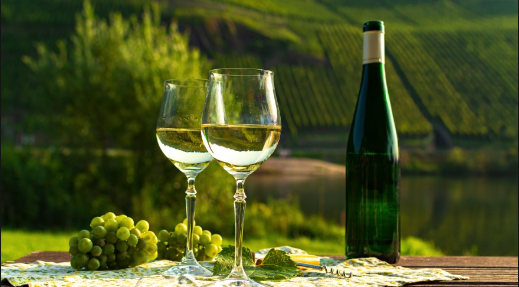

In [5]:
Image(filename='/Users/mac/Desktop/White wine.png')


### Red wine: The type of wine made from dark-colored grape varieties. However, the color of the wine can range from intense violet, typical of young wines, through to brick red for mature wines and brown for older red wines. The juice from most purple grapes is greenish-white, the red color coming from anthocyan pigments present in the skin of the grape. Much of the red wine production process involves extraction of color and flavor components from the grape skin.

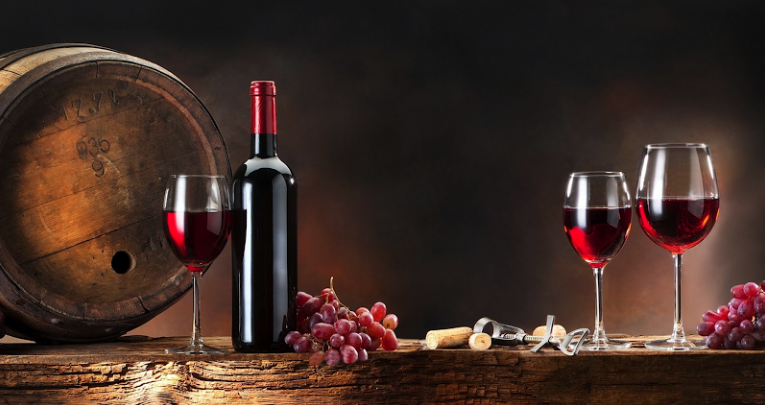

In [6]:
Image(filename='/Users/mac/Desktop/Red wine.png')

In [7]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
work.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Checking for Missing values and their percentage:

In [9]:
work_Nan = pd.DataFrame(work.isnull().sum()).T.rename(index={0:'NAN'})
work_Nan = work_Nan.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'%'}))
display(work_Nan)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
NAN,0.0,10.000000,8.000000,3.000000,2.000000,2.000000,0.0,0.0,0.0,9.000000,4.000000,0.0,0.0
%,0.0,0.153917,0.123134,0.046175,0.030783,0.030783,0.0,0.0,0.0,0.138525,0.061567,0.0,0.0


I can observe that there are missing values in the following columns:
#### fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH and suphates
However, the sum of these missing values in all the columns listed above makes up less than 1% of the total dataset hence, these missing values are dropped

In [10]:
work.dropna(inplace=True)

In [11]:
work_Nan = pd.DataFrame(work.isnull().sum()).T.rename(index={0:'NAN'})
work_Nan = work_Nan.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'NAN%'}))
display(work_Nan)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
NAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NAN%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [13]:
work.sample(6)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3741,white,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7
3362,white,7.2,0.22,0.28,7.2,0.060,41.0,132.0,0.99350,3.08,0.59,11.3,6
3680,white,6.8,0.15,0.41,12.9,0.044,79.5,183.0,0.99742,3.24,0.78,10.2,6
5975,red,8.6,0.37,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5
860,white,8.1,0.27,0.35,1.7,0.030,38.0,103.0,0.99255,3.22,0.63,10.4,8
5160,red,8.0,0.52,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0,5


### Outliers:
Boxplot is a useful technique to review the distribution of each feature in the dataset and also helps to identify outliers through the dots outside the whiskers

The positions of the dots shows the outliers, the farther away the dots from the whiskers or and the continous dots, the better it is identified as outliers. These outliers are removed to maintain model accuracy. 

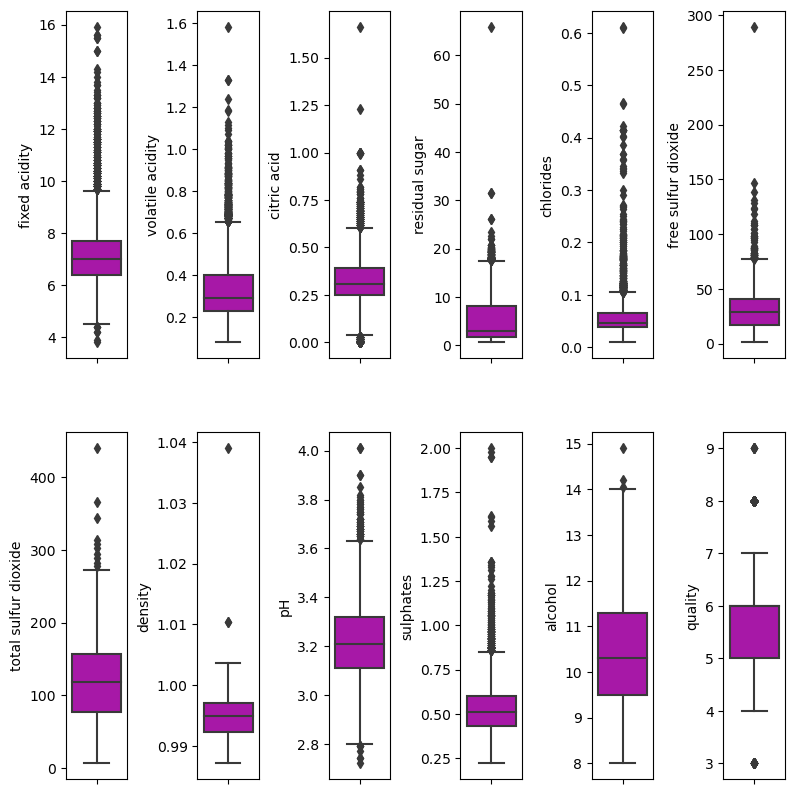

In [14]:
fig ,ax = plt.subplots(ncols=6, nrows =2, figsize=(8,8))
index = 0
ax =ax.flatten()

for col,value in work.items():
    if col !='type':
        sns.boxplot(y=col, data=work, ax = ax[index],color ='m')
        index +=1
plt.tight_layout(pad=0.9, w_pad=0.7, h_pad=5.0)

#### I can detect outliers via farther away dots from the whiskey or and continous dots in the following columns; volatile acidity, citric acid, residual sugar, chlories, free sulfiur dioxide and density. However, to remove these outliers, i select only values which are greater than 75% of the data and replace them by the value of Q3

### Volatile acidity Outliers:

In [15]:
work['volatile acidity'].describe()

count    6463.000000
mean        0.339589
std         0.164639
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

In [16]:
work = work[(work['citric acid'] <= 0.4)]

### Citric acid Outliers:

In [17]:
work['citric acid'].describe()

count    5012.000000
mean        0.262085
std         0.099070
min         0.000000
25%         0.220000
50%         0.280000
75%         0.330000
max         0.400000
Name: citric acid, dtype: float64

In [18]:
work = work[(work['citric acid'] <= 0.39)]

### Residual sugar Outliers:

In [19]:
work['residual sugar'].describe()

count    4867.000000
mean        5.292490
std         4.593866
min         0.600000
25%         1.800000
50%         2.900000
75%         7.900000
max        31.600000
Name: residual sugar, dtype: float64

In [20]:
work = work[(work['residual sugar'] <= 7.9)]

### Chlorides Outliers:

In [21]:
work['chlorides'].describe()

count    3674.000000
mean        0.054786
std         0.029587
min         0.009000
25%         0.036000
50%         0.046000
75%         0.070000
max         0.401000
Name: chlorides, dtype: float64

In [22]:
work = work[(work['chlorides'] <= 0.054)]

### Free sulfur dioxide Outliers:

In [23]:
work['free sulfur dioxide'].describe()

count    2369.000000
mean       31.174968
std        16.473691
min         3.000000
25%        20.000000
50%        30.000000
75%        40.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [24]:
work = work[(work['free sulfur dioxide'] <= 36)]

In [25]:
work['density'].describe()

count    1606.000000
mean        0.992107
std         0.001866
min         0.987220
25%         0.990683
50%         0.992000
75%         0.993467
max         0.998400
Name: density, dtype: float64

In [26]:
work = work[(work['density'] <= 0.996)]

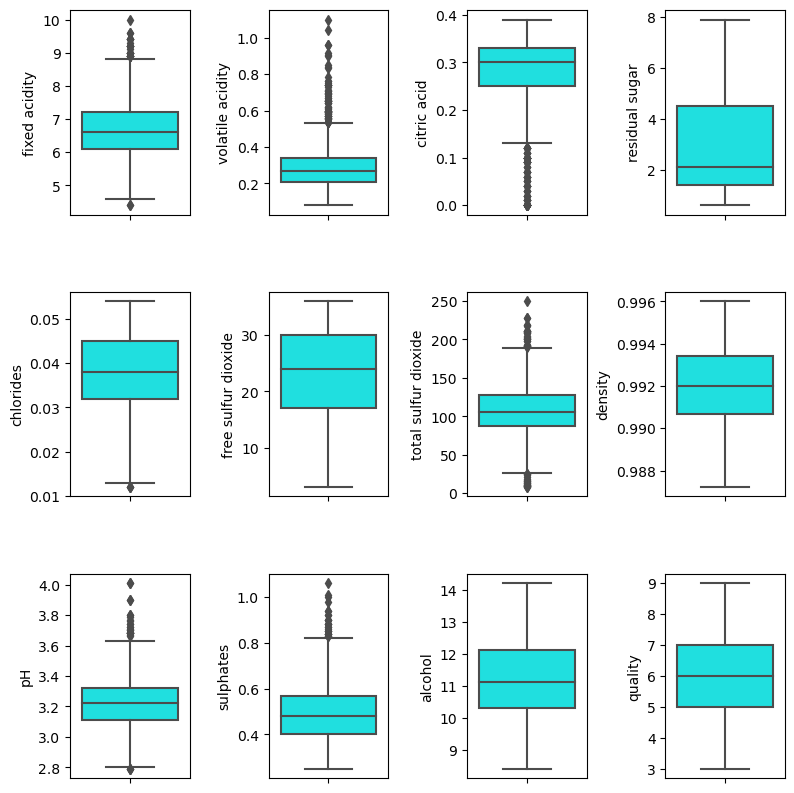

In [27]:
fig ,ax = plt.subplots(ncols = 4, nrows = 3, figsize=(8,8))
index = 0
ax =ax.flatten()

for col,value in work.items():
    if col !='type':
        sns.boxplot(y=col, data=work, ax = ax[index],color ='cyan')
        index +=1
plt.tight_layout(pad=0.9, w_pad=0.7, h_pad=5.0)

### I check for dataset skewness

In statistics, Skewness is a measure of the asymmetry of the probability distribution of a real valued random variable about its mean.Skewness can be positive, negative, zero or undefined. Skewness is used to obtain approximate probabilities and quantiles of distribution.Skewed data can mess up the power of predictive models if not addressed correctly hence, we will check for skewness of all the columns and therefore transform them.

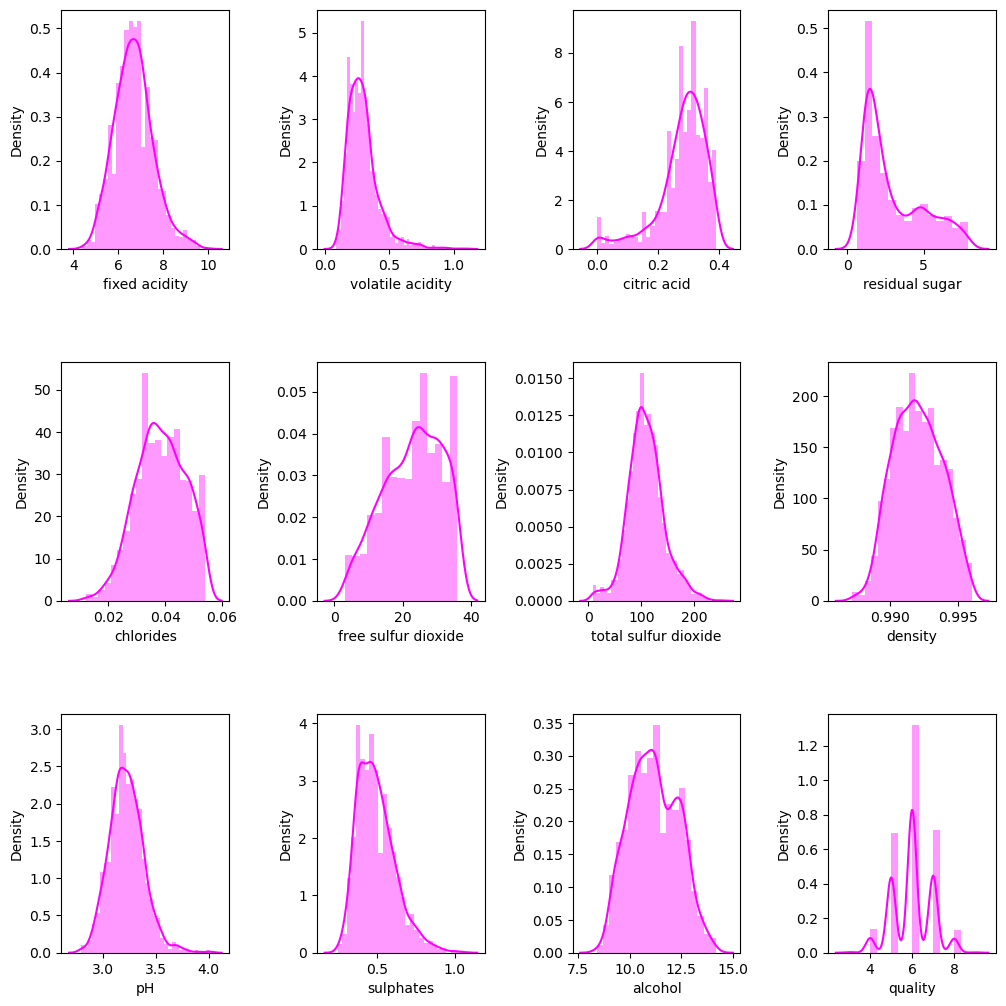

In [28]:
fig, axs = plt.subplots(ncols = 4,nrows = 3,figsize = (10,10))
index = 0
axs = axs.flatten()
for col, value in work.items():
    if col != 'type':
        sns.distplot(value, color='magenta',ax=axs[index],kde=True)
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)        

### I can observe that the data skewness covered a lot of data points hence, there is no need for transformation of data

In [29]:
work.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


## Modelling of Dataset:

In [30]:
work.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [31]:
work.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Regression algorithhms which included the Ordinary Least Square method was employed to evaluate the coeeficients and the effect of each chemical property on the quality of wine. However, before proceeding, it is of great importance to understand the columns and their roles in wine production:

In [32]:
white_wine = work.loc[work['type'] == 'white']
white_wine.set_index('type').head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
white,7.9,0.18,0.37,1.2,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
white,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7


In [33]:
red_wine = work.loc[work['type'] == 'red']
red_wine.set_index('type').head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
red,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.9937,3.63,0.63,13.0,5
red,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.9937,3.63,0.63,13.0,5
red,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6
red,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6


# Acidity in white and red wine:

Acidity is a characteristic determined by the total sum of acids that a sample contains. Acid is existential to wine and essential to a wine’s lifecycle from grape to glass. Without acid, wine wouldn’t ferment properly, age well, and ultimately wouldn’t refresh. In wines, acidity can be quantified in a group way which are Fixed Acidity and Volatile Acidity. 
* Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample. The lack of these acids will make the wine feel flabby and flat, and maybe even soapy, structureless, astringent and so oN.
* Volatile acidity is a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar. The fixed and volatile acidity can be measured g/dm^3

### White wine fixed Acidity:

In [34]:
white_fixed = white_wine.iloc[:, [1,12]]
white_fixed.head()

,fixed acidity,quality
1,6.3,6
6,6.2,6
8,6.3,6
12,7.9,5
15,6.6,7


In [35]:
x = white_fixed['fixed acidity']
y = white_fixed['quality']

In [36]:
x = sm.add_constant(x)
white_fixed_model = sm.OLS(y, x).fit()

In [37]:
print(white_fixed_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     16.67
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.69e-05
Time:                        20:45:11   Log-Likelihood:                -2029.6
No. Observations:                1522   AIC:                             4063.
Df Residuals:                    1520   BIC:                             4074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7590      0.188     35.973

Text(0, 0.5, 'Predicted Quality')

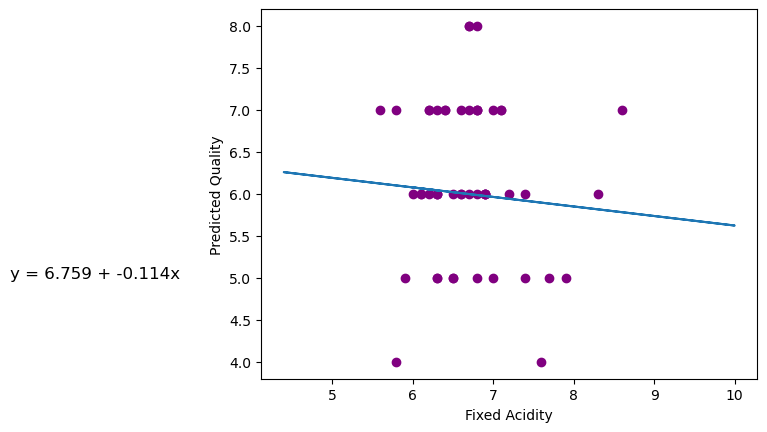

In [38]:
a, b = np.polyfit(white_fixed['fixed acidity'], white_fixed['quality'], 1)
plt.scatter(white_fixed['fixed acidity'][:50], white_fixed['quality'][:50], color='purple')
plt.plot(white_fixed['fixed acidity'], a*white_fixed['fixed acidity']+b)
plt.text(1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)
plt.xlabel('Fixed Acidity')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in fixed acidity, there is a 11% decrease in the quality

### The application is:
* White wine fixed quality = 6.759 - 0.1135 * (Z additional increase)


### Correlation coeffiecent:

#### Pearson's Correlation Coefficient (named for Karl Pearson) is used because it can summarize the strength of the linear relationship betweem two data samples

* If Pearson = 1 = Complete Correlation
* If Pearson = 0.8 = Strong positive correlation
* If Pearson = 0.6 = Moderate positive correlation
* If Pearson = 0 = No correlation
* If Pearson = -0.6 = Moderate negative correlation
* If Pearson = -0.8 = strong negative correlation


In [39]:
r = stats.pearsonr(white_fixed['fixed acidity'], white_fixed['quality'])
print(r)

PearsonRResult(statistic=-0.10414439610909668, pvalue=4.687172173588067e-05)


#### Conclusion: I can observe a negative linear relationship between the fixed acidity and the quality for white wines. However, according to the line of best fits, 6.5 - 7.4g/dm^3 of these Fixed acids is supported to be added in white wine

### Red wine fixed acidity:

In [40]:
red_fixed = red_wine.iloc[:, [1,12]]
red_fixed.head()

,fixed acidity,quality
4943,4.6,4
5029,5.6,5
5030,5.6,5
5040,5.2,6
5042,5.2,6


In [41]:
x = red_fixed['fixed acidity']
y = red_fixed['quality']

In [42]:
x = sm.add_constant(x)
red_fixed_model = sm.OLS(y, x).fit()

In [43]:
print(red_fixed_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                  0.009801
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.922
Time:                        20:45:11   Log-Likelihood:                -71.163
No. Observations:                  55   AIC:                             146.3
Df Residuals:                      53   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9836      0.726      8.237

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

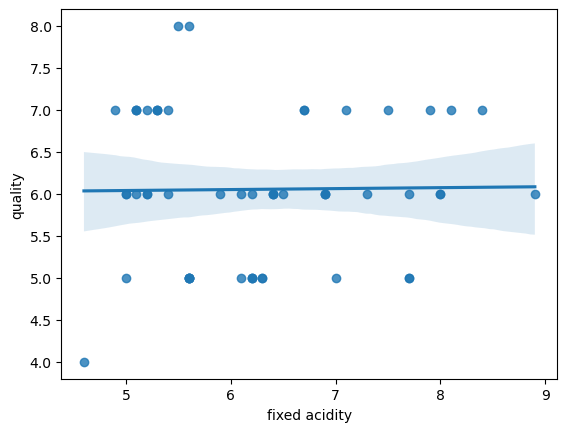

In [44]:
sns.regplot(x = 'fixed acidity', y = 'quality', data = red_fixed)

### This Model tells us that for each additional increase in fixed acidity, there is a 1% inrease in the quality

### The application is:
* Red wine fixed quality = 5.9836 + 0.0114 * (Z additional increase)


In [45]:
r = stats.pearsonr(red_fixed['fixed acidity'], red_fixed['quality'])
print(r)

PearsonRResult(statistic=0.013597768599319939, pvalue=0.9215098715217326)


#### Conclusion: I can observe a zero linear relationship between the fixed acidity and the quality for red wine. Hence, fixed aciditiy has no effect on the quality

### White wine volatile Acidity:

In [46]:
white_volatile = white_wine.iloc[:, [2,12]]
white_volatile.head()

,volatile acidity,quality
1,0.30,6
6,0.32,6
8,0.30,6
12,0.18,5
15,0.17,7


In [47]:
x = white_volatile['volatile acidity']
y = white_volatile['quality']

In [48]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     27.35
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.93e-07
Time:                        20:45:12   Log-Likelihood:                -2024.3
No. Observations:                1522   AIC:                             4053.
Df Residuals:                    1520   BIC:                             4063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.3185      0.066  

Text(0, 0.5, 'Predicted Quality')

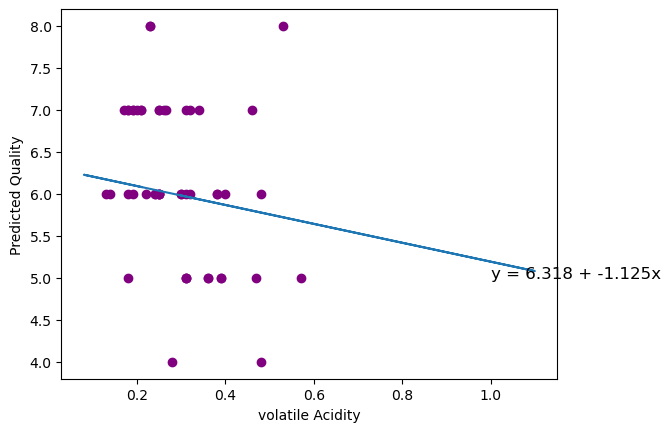

In [50]:
a, b = np.polyfit(white_volatile['volatile acidity'], white_volatile['quality'], 1)
plt.scatter(white_volatile['volatile acidity'][:50], white_volatile['quality'][:50], color='purple')
plt.plot(white_volatile['volatile acidity'], a*white_volatile['volatile acidity']+b)
plt.text(1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)
plt.xlabel('volatile Acidity')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in volatile acidity in white wines, there is a 112.5% decrease in the quality

### The application is:
* White wine volatile quality = 6.318 - 1.125 * (Z additional increase)


In [51]:
r = stats.pearsonr(white_volatile['volatile acidity'], white_volatile['quality'])
print(r)

PearsonRResult(statistic=-0.13294667049579137, pvalue=1.9349008498192584e-07)


#### Conclusion: I can observe a negative linear relationship between the volatile acidity and the quality for white wines. Hence, an increase in volatile acidity will cause a decrease in the quality. However, according to the line of best fit, 0.30 to 0.38g/dm^3 of these volatile acids is supported to be added in red wine

### Red wine volatile acidity:

In [52]:
red_volatile = red_wine.iloc[:, [2,12]]
red_volatile.head()

,volatile acidity,quality
4943,0.52,4
5029,0.50,5
5030,0.50,5
5040,0.34,6
5042,0.34,6


In [53]:
x = red_volatile['volatile acidity']
y = red_volatile['quality']

In [54]:
x = sm.add_constant(x)
red_volatile_model = sm.OLS(y, x).fit()

In [55]:
print(red_volatile_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     5.751
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0200
Time:                        20:45:12   Log-Likelihood:                -68.335
No. Observations:                  55   AIC:                             140.7
Df Residuals:                      53   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.7657      0.318  

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

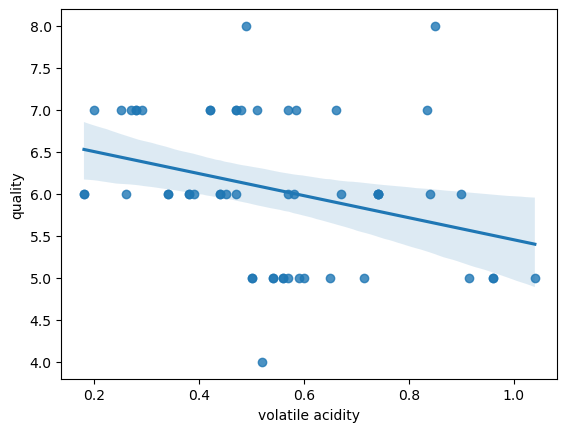

In [56]:
sns.regplot(x = 'volatile acidity', y = 'quality', data = red_volatile)

### This Model tells us that for each additional increase in volatile acidity in white wines, there is a 131% decrease in the quality

### The application is:
* Red wine volatile quality = 6.766 - 1.312 * (Z additional increase)

In [57]:
r = stats.pearsonr(red_volatile['volatile acidity'], red_volatile['quality'])
print(r)

PearsonRResult(statistic=-0.3128616489001073, pvalue=0.020036249373644097)


#### Conclusion: I can observe a negative linear relationship between the volatile acidity and the quality for red wine. However, 0.6g/dm^3 is supported to be added in red wine

# Citric acid in White and Red wine:
Citric acid: This is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. However, the disadvantage of adding citric acid is its microbial instability.

### White wine citric acid:

In [58]:
white_citric = white_wine.iloc[:, [3,12]]
white_citric.head()

,citric acid,quality
1,0.34,6
6,0.16,6
8,0.34,6
12,0.37,5
15,0.38,7


In [59]:
x = white_citric['citric acid']
y = white_citric['quality']

In [60]:
x = sm.add_constant(x)
white_citric_model = sm.OLS(y, x).fit()

In [61]:
print(white_citric_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     62.22
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           5.81e-15
Time:                        20:45:13   Log-Likelihood:                -2007.4
No. Observations:                1522   AIC:                             4019.
Df Residuals:                    1520   BIC:                             4029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2769      0.094     55.948      

Text(0, 0.5, 'Predicted Quality')

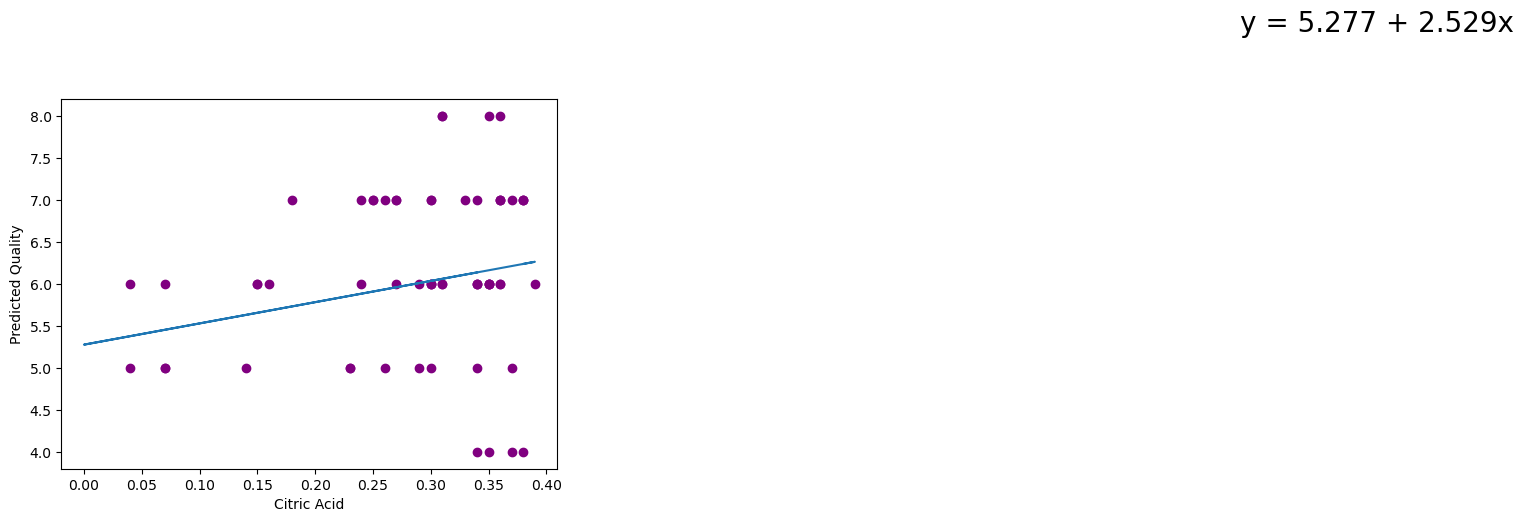

In [62]:
a, b = np.polyfit(white_citric['citric acid'], white_citric['quality'], 1)
plt.scatter(white_citric['citric acid'][:60], white_citric['quality'][:60], color='purple')
plt.plot(white_citric['citric acid'], a*white_citric['citric acid']+b)
plt.text(1, 9, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=20)
plt.xlabel('Citric Acid')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in citric acid for white wines, there is an average increase in quality of 2.529

### The application is:
* White wine citric acid with quality = 5.277 + 2.529 * (Z additional increase)


In [63]:
r = stats.pearsonr(white_citric['citric acid'], white_citric['quality'])
print(r)

PearsonRResult(statistic=0.19831020690683587, pvalue=5.812414528741262e-15)


#### Conclusion: I can observe a positive linear relationship between the citric acid and the quality for white wine. Hence, its addition in white wine is of great value. However, a right propotion (between 0.26 g/dm^3 - 0.30 g/dm^3 from the graph) should be added

### Red wine citric acid:

In [64]:
red_citric = red_wine.iloc[:, [3,12]]
red_citric.head()

,citric acid,quality
4943,0.15,4
5029,0.09,5
5030,0.09,5
5040,0.00,6
5042,0.00,6


In [65]:
x = red_citric['citric acid']
y = red_citric['quality']

In [66]:
x = sm.add_constant(x)
red_citric_model = sm.OLS(y, x).fit()

In [67]:
print(red_citric_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2175
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.643
Time:                        20:45:13   Log-Likelihood:                -71.055
No. Observations:                  55   AIC:                             146.1
Df Residuals:                      53   BIC:                             150.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.9971      0.173     34.750      

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

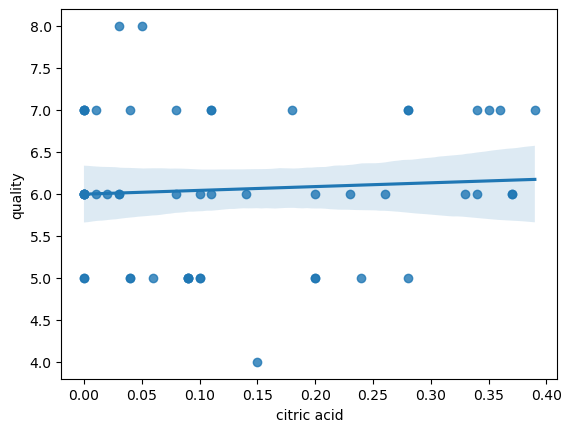

In [68]:
sns.regplot(x = 'citric acid', y = 'quality', data = red_citric)

### This Model tells us that for each additional increase in citric acid for red wine, there is an average increase in quality of 0.451

### The application is:
* Red wine citric acid with quality = 5.997 + 0.451 * (Z additional increase)


In [69]:
r = stats.pearsonr(red_citric['citric acid'], red_citric['quality'])
print(r)

PearsonRResult(statistic=0.06393008526228873, pvalue=0.64286048245723)


#### Conclusion: I can observe a zero linear relationship between the citric acid and the quality for red wine. Hence, citric acid has no effect on the quality

# Residual Sugar in White and Red wine:
Sweetness in wine is called residual sugar and is usually measured in grams per litre (g/L). Residual sugar is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is. However, it is certainly not due to the addition of sugar!

### White wine residual sugar:

In [70]:
white_RS = white_wine.iloc[:, [4,12]]
white_RS.head()

,residual sugar,quality
1,1.6,6
6,7.0,6
8,1.6,6
12,1.2,5
15,1.5,7


In [71]:
x = white_RS['residual sugar']
y = white_RS['quality']

In [72]:
x = sm.add_constant(x)
white_RS_model = sm.OLS(y, x).fit()

In [73]:
print(white_RS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.76
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           0.000622
Time:                        20:45:13   Log-Likelihood:                -2032.0
No. Observations:                1522   AIC:                             4068.
Df Residuals:                    1520   BIC:                             4079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8759      0.043    137.

Text(0, 0.5, 'Predicted Quality')

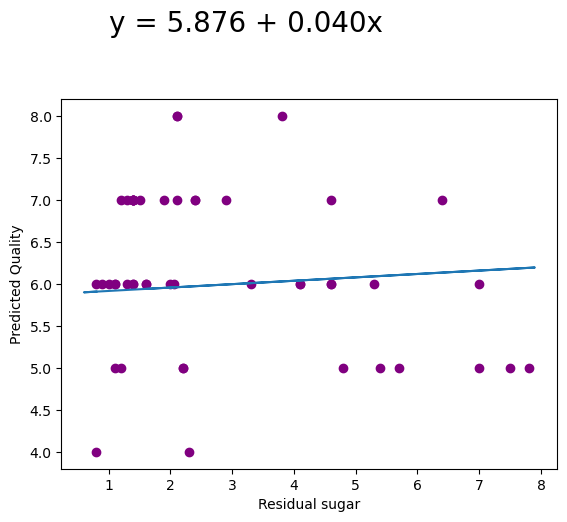

In [74]:
a, b = np.polyfit(white_RS['residual sugar'], white_RS['quality'], 1)
plt.scatter(white_RS['residual sugar'][:50], white_RS['quality'][:50], color='purple')
plt.plot(white_RS['residual sugar'], a*white_RS['residual sugar']+b)
plt.text(1, 9, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=20)
plt.xlabel('Residual sugar')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in residual sugar for white wine, there is an average increase in quality of 0.04

### The application is:
* White wine residual sugar with quality = 5.876 + 0.04 * (Z additional increase)


In [75]:
r = stats.pearsonr(white_RS['residual sugar'], white_RS['quality'])
print(r)

PearsonRResult(statistic=0.08761819145968128, pvalue=0.0006216072517709557)


#### Conclusion: I can observe a zero linear relationship between the residual sugar and the quality for white wine. Hence, residual sugar has no effect on the quality

### Red wine residual sugar:

In [76]:
red_RS = red_wine.iloc[:, [4,12]]
red_RS.head()

,residual sugar,quality
4943,2.1,4
5029,2.3,5
5030,2.3,5
5040,1.8,6
5042,1.8,6


In [77]:
X = red_RS['residual sugar']
Y = red_RS['quality']

In [78]:
X = sm.add_constant(X)
red_RS_model = sm.OLS(Y, X).fit()

In [79]:
print(red_RS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                  0.003672
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.952
Time:                        20:45:14   Log-Likelihood:                -71.166
No. Observations:                  55   AIC:                             146.3
Df Residuals:                      53   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.0861      0.534     11.

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

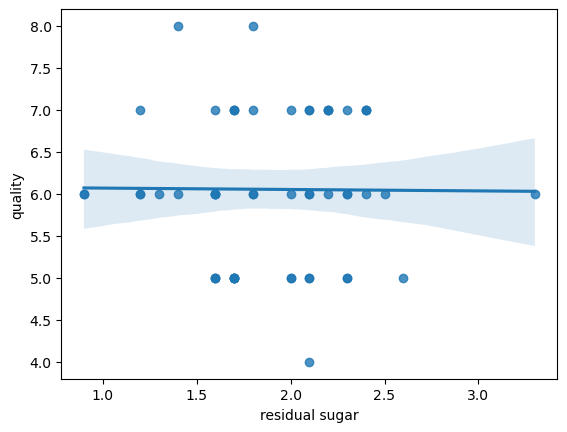

In [80]:
sns.regplot(x = 'residual sugar', y = 'quality', data = red_RS)

### This Model tells us that for each additional increase in residual sugar for white wine, there is an average decrease in quality of 0.017

### The application is:
* Red wine residual sugar with quality = 6.086 - 0.017 * (Z additional increase)


In [81]:
r = stats.pearsonr(red_RS['residual sugar'], red_RS['quality'])
print(r)

PearsonRResult(statistic=-0.008323849983740046, pvalue=0.9519052039799805)


#### Conclusion: I can observe a zero linear relationship between the residual sugar and the quality for red wine. Hence, residual sugar has no effect on the quality

# Chlorides in White and Red wine:
Basically, chlorides is the amount of salt in wine which significantly contributes to the wine's sensory characteristics, affecting color, clearness, flavor and aroma.

### White wine chlorides:

In [82]:
white_CL = white_wine.iloc[:, [5, 12]]
white_CL.head()

,chlorides,quality
1,0.049,6
6,0.045,6
8,0.049,6
12,0.040,5
15,0.032,7


In [83]:
x = white_CL['chlorides']
y = white_CL['quality']

In [84]:
x = sm.add_constant(x)
whiteCL_model = sm.OLS(y, x).fit()

In [85]:
print(whiteCL_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.91e-27
Time:                        20:45:14   Log-Likelihood:                -1979.6
No. Observations:                1522   AIC:                             3963.
Df Residuals:                    1520   BIC:                             3974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1259      0.105     67.845      0.0

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

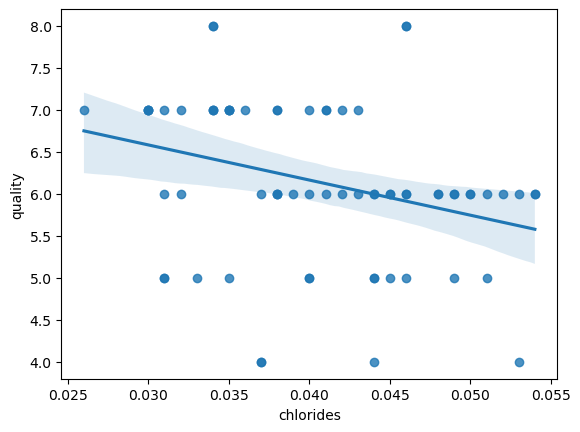

In [86]:
sns.regplot(x = 'chlorides', y = 'quality', data = white_CL[:70])

### This Model tells us that for each additional increase in chlorides for white wine, there is an average decrease in quality of 29.61

### The application is:
* White wine chlorides with quality = 7.125 - 29.61 * (Z additional increase)


In [87]:
r = stats.pearsonr(white_CL['chlorides'], white_CL['quality'])
print(r)

PearsonRResult(statistic=-0.271544473347546, pvalue=3.9073855730680655e-27)


#### Conclusion: I can observe a negative linear relationship between the chlorides and the quality for white wine. Hence, its addition in white wine will decrease the quality of white wine. However, a right propotion (between 0.044 g/dm^3 - 0.045 g/dm^3 from the line of best fit) should be added

### Red wine chlorides:

In [88]:
red_CL = red_wine.iloc[:, [5, 12]]
red_CL.head()

,chlorides,quality
4943,0.054,4
5029,0.049,5
5030,0.049,5
5040,0.050,6
5042,0.050,6


In [89]:
x = red_CL['chlorides']
y = red_CL['quality']

In [90]:
x = sm.add_constant(x)
redCL_model = sm.OLS(y, x).fit()

In [91]:
print(redCL_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.648
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0357
Time:                        20:45:14   Log-Likelihood:                -68.856
No. Observations:                  55   AIC:                             141.7
Df Residuals:                      53   BIC:                             145.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5080      0.684     10.975      0.0

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

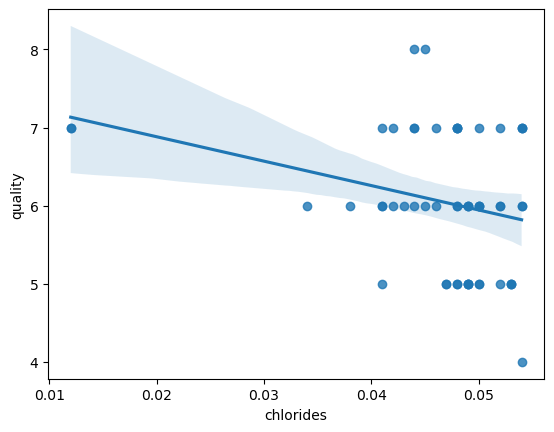

In [92]:
sns.regplot(x = 'chlorides', y = 'quality', data = red_CL)

### This Model tells us that for each additional increase in chlorides for white wine, there is an average decrease in quality of 31.26

### The application is:
* Red wine chlorides with quality = 7.508 - 31.26 * (Z additional increase)


In [93]:
r = stats.pearsonr(red_CL['chlorides'], red_CL['quality'])
print(r)

PearsonRResult(statistic=-0.28394298652665834, pvalue=0.03565293971794285)


#### Conclusion: I can observe a negative linear relationship between the chlorides and the quality for red wine. Hence, its addition in white wine will decrease the quality of white wine. However, a right propotion (between 0.045 g/dm^3 - 0.05g/dm^3 from the line of best fit) should be added

# Free sulfur dioxide in White and Red wine:
In winemaking, the use of sulfur dioxide (SO2) is critical. 
* The free sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. It exists in three forms; bisulfite (HSO3-), molecular SO2, and sulfite (SO32).
* The Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.


### White wine free S02:

In [94]:
white_S02 = white_wine.iloc[:, [6, 12]]
white_S02.head()

,free sulfur dioxide,quality
1,14.0,6
6,30.0,6
8,14.0,6
12,16.0,5
15,28.0,7


In [95]:
x = white_S02['free sulfur dioxide']
y = white_S02['quality']

In [96]:
x = sm.add_constant(x)
white_S02_model = sm.OLS(y, x).fit()

In [97]:
print(white_S02_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     148.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.08e-32
Time:                        20:45:15   Log-Likelihood:                -1966.9
No. Observations:                1522   AIC:                             3938.
Df Residuals:                    1520   BIC:                             3948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.2344    

Text(0, 0.5, 'Predicted Quality')

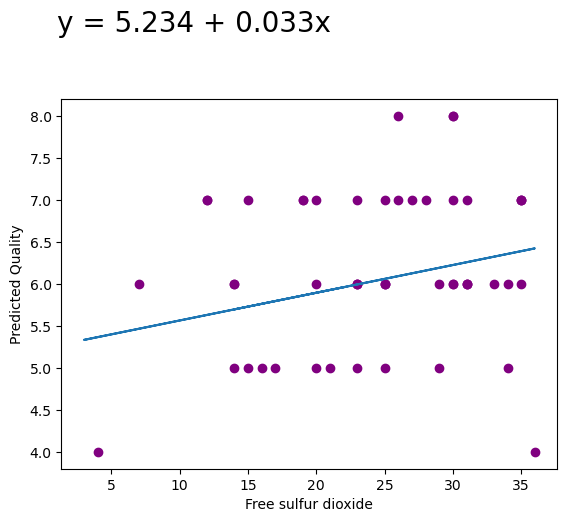

In [98]:
a, b = np.polyfit(white_S02['free sulfur dioxide'], white_S02['quality'], 1)
plt.scatter(white_S02['free sulfur dioxide'][:50], white_S02['quality'][:50], color='purple')
plt.plot(white_S02['free sulfur dioxide'], a*white_S02['free sulfur dioxide']+b)
plt.text(1, 9, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=20)
plt.xlabel('Free sulfur dioxide')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in free sulfur dioxide for white wine, there is an average increase in quality of 0.033

### The application is:
* White wine chlorides with quality = 5.234 + 0.033 * (Z additional increase)


In [99]:
r = stats.pearsonr(white_S02['free sulfur dioxide'], white_S02['quality'])
print(r)

PearsonRResult(statistic=0.2984838146830791, pvalue=1.0803772148350103e-32)


#### Conclusion: I can observe a positive linear relationship between the free sulfur dioxide and the quality for white wine. Hence, its addition in white wine will increase the quality of white wine. However, a right propotion (between 23mg/dm^3 - 0.05mg/dm^3 from the line of best fit) should be added

### Red wine free S02:

In [100]:
red_S02 = red_wine.iloc[:, [6, 12]]
red_S02.head()

,free sulfur dioxide,quality
4943,8.0,4
5029,17.0,5
5030,17.0,5
5040,27.0,6
5042,27.0,6


In [101]:
x = red_S02['free sulfur dioxide']
y = red_S02['quality']

In [102]:
x = sm.add_constant(x)
red_S02_model = sm.OLS(y, x).fit()

In [103]:
print(red_S02_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8951
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.348
Time:                        20:45:15   Log-Likelihood:                -70.708
No. Observations:                  55   AIC:                             145.4
Df Residuals:                      53   BIC:                             149.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8640    

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

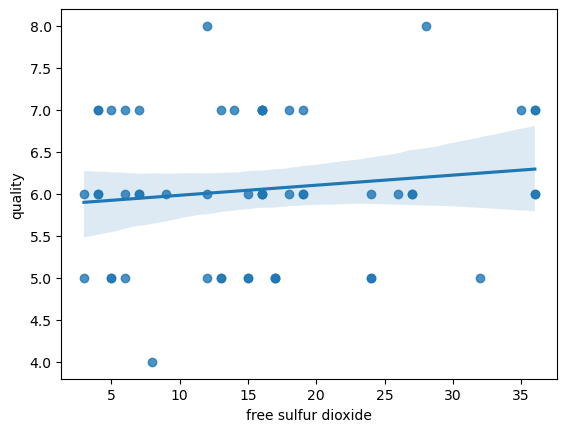

In [104]:
sns.regplot(x = 'free sulfur dioxide', y = 'quality', data = red_S02)

### This Model tells us that for each additional increase in free sulfur dioxide for red wine, there is an average increase in quality of 0.012

### The application is:
* Red wine chlorides with quality = 5.86 + 0.012 * (Z additional increase)


In [105]:
r = stats.pearsonr(red_S02['free sulfur dioxide'], red_S02['quality'])
print(r)

PearsonRResult(statistic=0.12887300867523638, pvalue=0.3483916590649352)


#### Conclusion: I can observe a positive linear relationship between the free sulfur dioxide and the quality for red wine. Hence, its addition in white wine will increase the quality of red wine. However, a right propotion (between 7mg/dm^3 - 16mg/dm^3 from the line of best fit) should be added

### White wine total dioxide:

In [106]:
white_total_S02 = white_wine.iloc[:, [7, 12]]
white_total_S02.head()

,total sulfur dioxide,quality
1,132.0,6
6,136.0,6
8,132.0,6
12,75.0,5
15,112.0,7


In [107]:
x = white_total_S02['total sulfur dioxide']
y = white_total_S02['quality']

In [108]:
x = sm.add_constant(x)
white_total_S02_model = sm.OLS(y, x).fit()

In [109]:
print(white_total_S02_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.038
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0447
Time:                        20:45:16   Log-Likelihood:                -2035.9
No. Observations:                1522   AIC:                             4076.
Df Residuals:                    1520   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1606 

Text(0, 0.5, 'Predicted Quality')

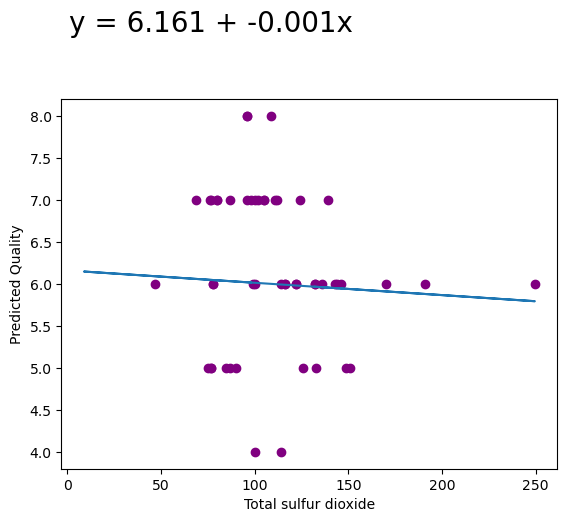

In [110]:
a, b = np.polyfit(white_total_S02['total sulfur dioxide'], white_total_S02['quality'], 1)
plt.scatter(white_total_S02['total sulfur dioxide'][:50], white_total_S02['quality'][:50], color='purple')
plt.plot(white_total_S02['total sulfur dioxide'], a*white_total_S02['total sulfur dioxide']+b)
plt.text(1, 9, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=20)
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in free sulfur dioxide for white wine, there is an average decrease in quality of 0.001

### The application is:
* White wine total sulfur dioxide with quality = 6.161 - 0.0011 * (Z additional increase)


In [111]:
r = stats.pearsonr(white_total_S02['total sulfur dioxide'], white_total_S02['quality'])
print(r)

PearsonRResult(statistic=-0.05147376905854535, pvalue=0.04466263764688828)


#### Conclusion: I can observe a negative linear relationship between the total sulfur dioxide and the quality for white wine. Hence, its addition in white wine will decrease the quality of white wine. However, a right propotion (between 80mg/dm^3 - 160mg/dm^3 from the line of best fit) should be added

### Red wine total dioxide:

In [112]:
red_total_S02 = red_wine.iloc[:, [7, 12]]
red_total_S02.head()

,total sulfur dioxide,quality
4943,65.0,4
5029,99.0,5
5030,99.0,5
5040,63.0,6
5042,63.0,6


In [113]:
x = red_total_S02['total sulfur dioxide']
y = red_total_S02['quality']

In [114]:
x = sm.add_constant(x)
red_total_S02_model = sm.OLS(y, x).fit()

In [115]:
print(red_total_S02_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.864
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0964
Time:                        20:45:16   Log-Likelihood:                -69.721
No. Observations:                  55   AIC:                             143.4
Df Residuals:                      53   BIC:                             147.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7355 

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

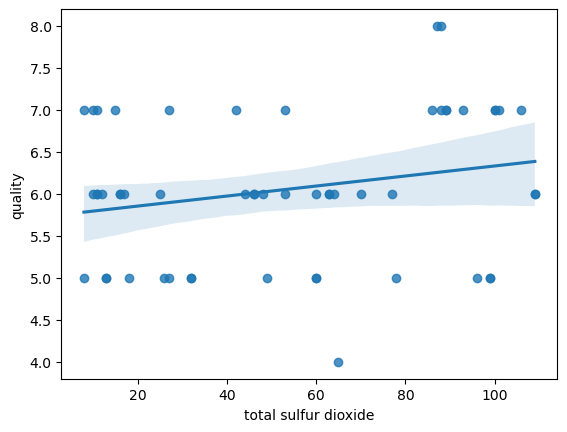

In [116]:
sns.regplot(x = 'total sulfur dioxide', y = 'quality', data = red_total_S02)

### This Model tells us that for each additional increase in total sulfur dioxide for red wine, there is an average increase in quality of 0.006

### The application is:
* Red wine total sulfur dioxide with quality = 5.735 - 0.006 * (Z additional increase)


In [117]:
r = stats.pearsonr(red_total_S02['total sulfur dioxide'], red_total_S02['quality'])
print(r)

PearsonRResult(statistic=0.22643182053650096, pvalue=0.09644032399109297)


#### Conclusion: I can observe a positive linear relationship between the total sulfur dioxide and the quality for red wine. Hence, its addition in white wine will increase the quality of red wine. However, a right propotion (between 48mg/dm^3 - 58mg/dm^3 from the line of best fit) should be added

# Density in white and red wine:
The density of a substance is its mass per unite volume. In wine, density aids keeping alcohol level constant

### White wine density:

In [118]:
white_density = white_wine.iloc[:, [8, 12]]
white_density.head()

,density,quality
1,0.9940,6
6,0.9949,6
8,0.9940,6
12,0.9920,5
15,0.9914,7


In [119]:
x = white_density['density']
y = white_density['quality']

In [120]:
x = sm.add_constant(x)
white_denstity_model = sm.OLS(y, x).fit()

In [121]:
print(white_denstity_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.56e-53
Time:                        20:45:17   Log-Likelihood:                -1919.6
No. Observations:                1522   AIC:                             3843.
Df Residuals:                    1520   BIC:                             3854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.8059     12.307     16.478      0.0

Text(0, 0.5, 'Predicted Quality')

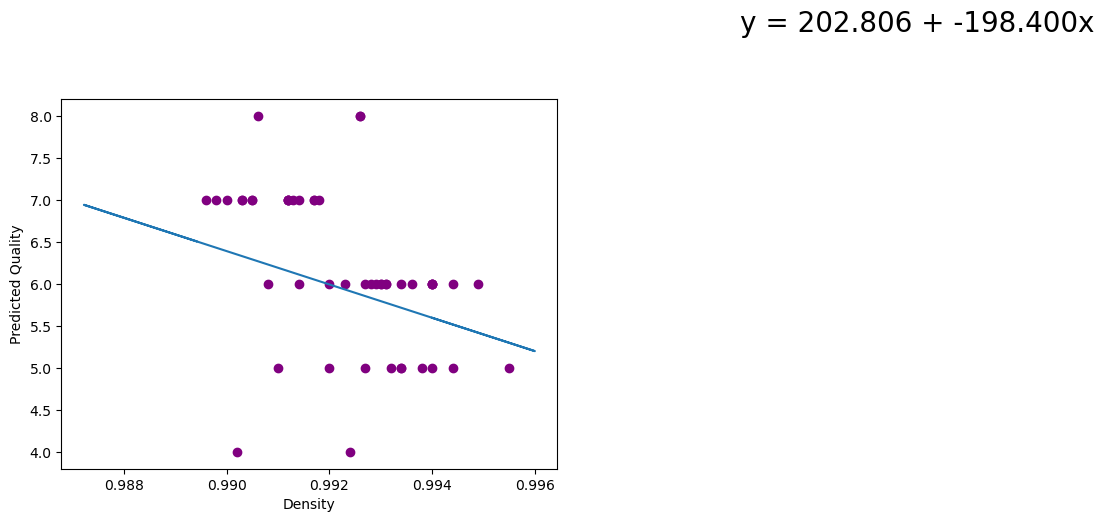

In [122]:
a, b = np.polyfit(white_density['density'], white_density['quality'], 1)
plt.scatter(white_density['density'][:50], white_density['quality'][:50], color='purple')
plt.plot(white_density['density'], a*white_density['density']+b)
plt.text(1, 9, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=20)
plt.xlabel('Density')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in density for white wine, there is an average decrease in quality of 198.400

### The application is:
* White wine density with quality = 202.806 - 198.400 * (Z additional increase)


In [123]:
r = stats.pearsonr(white_density['density'], white_density['quality'])
print(r)

PearsonRResult(statistic=-0.3794811926488944, pvalue=2.5576063804519093e-53)


#### Conclusion: I can observe a negative linear relationship between the density and the quality for white wine. Hence, its addition in white wine will decrease the quality of white wine. However, a right propotion (between 0.992g/cm^3 - 0.994g/cm^3 from the line of best fit) should be added

### Red wine density:

In [124]:
red_density = red_wine.iloc[:, [8, 12]]
red_density.head()

,density,quality
4943,0.9934,4
5029,0.9937,5
5030,0.9937,5
5040,0.9916,6
5042,0.9916,6


In [125]:
x = red_density['density']
y = red_density['quality']

In [126]:
x = sm.add_constant(x)
red_denstity_model = sm.OLS(y, x).fit()

In [127]:
print(red_denstity_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     9.714
Date:                Tue, 18 Apr 2023   Prob (F-statistic):            0.00295
Time:                        20:45:17   Log-Likelihood:                -66.540
No. Observations:                  55   AIC:                             137.1
Df Residuals:                      53   BIC:                             141.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        236.7136     74.006      3.199      0.0

<AxesSubplot:xlabel='density', ylabel='quality'>

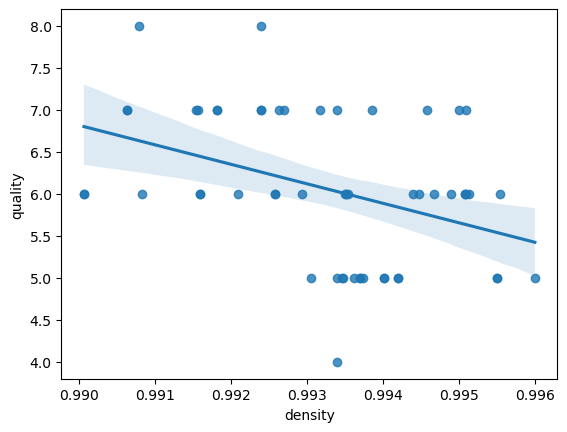

In [128]:
sns.regplot(x = 'density', y = 'quality', data = red_density)

### This Model tells us that for each additional increase in density for white wine, there is an average decrease in quality of 232.2178

### The application is:
* White wine density with quality = 236.71 - 232.21* (Z additional increase)


In [129]:
r = stats.pearsonr(red_density['density'], red_density['quality'])
print(r)

PearsonRResult(statistic=-0.39356698458983264, pvalue=0.0029517843598448946)


#### Conclusion: I can observe a negative linear relationship between the density and the quality for red wine. Hence, its addition in white wine will decrease the quality of red wine. However, a right propotion (between 0.9934g/cm^3 - 0.9937g/cm^3 from the line of best fit) should be added

# PH in white and red wine:
PH describes how acidic or basic a substance is on a scale from 0 (very acidic) to 14 (very basic)

### White wine PH:

In [130]:
white_ph = white_wine.iloc[:, [9, 12]]
white_ph.head()

,pH,quality
1,3.30,6
6,3.18,6
8,3.30,6
12,3.18,5
15,3.25,7


In [131]:
x = white_ph['pH']
y = white_ph['quality']

In [132]:
x = sm.add_constant(x)
white_ph_model = sm.OLS(y, x).fit()

In [133]:
print(white_ph_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     17.52
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.00e-05
Time:                        20:45:17   Log-Likelihood:                -2029.2
No. Observations:                1522   AIC:                             4062.
Df Residuals:                    1520   BIC:                             4073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9105      0.499      7.833      0.0

<AxesSubplot:xlabel='pH', ylabel='quality'>

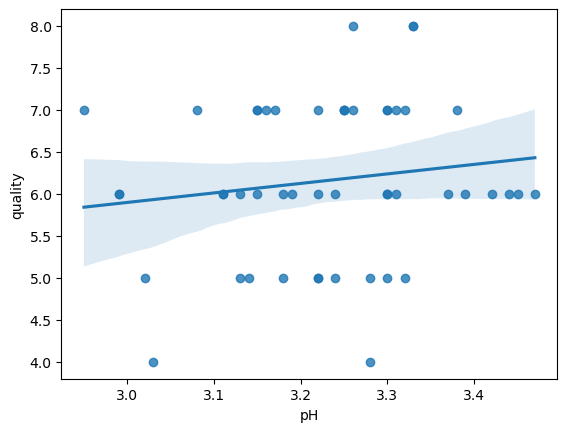

In [134]:
sns.regplot(x = 'pH', y = 'quality', data = white_ph[:50])

### This Model tells us that for each additional increase in PH for white wine, there is an average increase in quality of 0.6498

### The application is:
* White wine density with quality = 3.91 + 0.6498 * (Z additional increase)


In [135]:
r = stats.pearsonr(white_ph['pH'], white_ph['quality'])
print(r)

PearsonRResult(statistic=0.10675469089802972, pvalue=3.0020556861600675e-05)


#### Conclusion: I can observe the PH level is acidic for white wine that is, PH level between 0-4. Furthermore, there is a positive linear relationship between the PH and the quality for red wine. Hence, its addition in white wine will increase the quality of red wine. However, a right propotion (between 3.11 - 3.13 from the line of best fit) should be added

### Red wine PH:

In [136]:
red_ph = red_wine.iloc[:, [9, 12]]
red_ph.head()

,pH,quality
4943,3.90,4
5029,3.63,5
5030,3.63,5
5040,3.68,6
5042,3.68,6


In [137]:
x = red_ph['pH']
y = red_ph['quality']

In [138]:
x = sm.add_constant(x)
red_ph_model = sm.OLS(y, x).fit()

In [139]:
print(red_ph_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.538
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.117
Time:                        20:45:18   Log-Likelihood:                -69.882
No. Observations:                  55   AIC:                             143.8
Df Residuals:                      53   BIC:                             147.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0226      1.867      4.834      0.0

<AxesSubplot:xlabel='pH', ylabel='quality'>

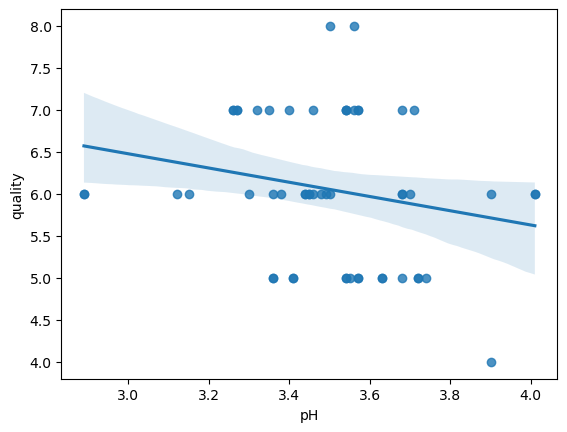

In [140]:
sns.regplot(x = 'pH', y = 'quality', data = red_ph)

### This Model tells us that for each additional increase in PH for white wine, there is an average decrease in quality of 0.8481

### The application is:
* White wine density with quality = 9.023 + 0.8481 * (Z additional increase)


In [141]:
r = stats.pearsonr(red_ph['pH'], red_ph['quality'])
print(r)

PearsonRResult(statistic=-0.21378592284961992, pvalue=0.11705807640769579)


#### Conclusion: I can observe the PH level is acidic for red wine that is, PH level between 0-4. Furthermore, there is a negative linear relationship between the PH and the quality for red wine. Hence, its addition in red wine will decrease the quality of red wine. However, a right propotion (between 3.45 - 3.47 from the line of best fit) should be added

# Sulphates in white and red wine:
Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. However, while some people can tolerate sulfites, others may experience serious side effects such as hives, swelling, and stomach pain.

### White wine sulphates:

In [142]:
white_sulphates = white_wine.iloc[:, [10, 12]]
white_sulphates.head()

,sulphates,quality
1,0.49,6
6,0.47,6
8,0.49,6
12,0.63,5
15,0.55,7


In [143]:
x = white_sulphates['sulphates']
y = white_sulphates['quality']

In [144]:
x = sm.add_constant(x)
white_sulphates_model = sm.OLS(y, x).fit()

In [145]:
print(white_sulphates_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     19.54
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.06e-05
Time:                        20:45:18   Log-Likelihood:                -2028.2
No. Observations:                1522   AIC:                             4060.
Df Residuals:                    1520   BIC:                             4071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5632      0.101     54.996      0.0

Text(0, 0.5, 'Predicted Quality')

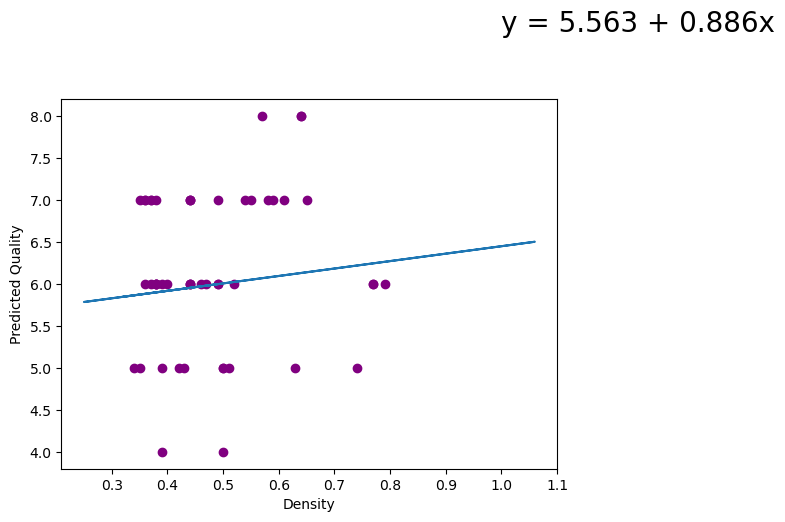

In [146]:
a, b = np.polyfit(white_sulphates['sulphates'], white_sulphates['quality'], 1)
plt.scatter(white_sulphates['sulphates'][:50], white_sulphates['quality'][:50], color='purple')
plt.plot(white_sulphates['sulphates'], a*white_sulphates['sulphates']+b)
plt.text(1, 9, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=20)
plt.xlabel('Density')
plt.ylabel('Predicted Quality')

### This Model tells us that for each additional increase in sulphates for white wine, there is an average increase in quality of 0.886

### The application is:
* White wine sulphates with quality = 5.563 + 0.886*(Z additional increase)


In [147]:
r = stats.pearsonr(white_sulphates['sulphates'], white_sulphates['quality'])
print(r)

PearsonRResult(statistic=0.11265323894727962, pvalue=1.0561851473851405e-05)


#### Conclusion: I can observe a positive linear relationship between the sulphates and the quality for white wine. Hence, its addition in white wine will increase the quality of white wine. However, a right propotion (between 0.42g/dm^3 - 0.53g/dm^3 from the line of best fit) should be added

### Red wine sulphates:

In [148]:
red_sulphates = red_wine.iloc[:, [10, 12]]
red_sulphates.head()

,sulphates,quality
4943,0.56,4
5029,0.63,5
5030,0.63,5
5040,0.79,6
5042,0.79,6


In [149]:
x = red_sulphates['sulphates']
y = red_sulphates['quality']

In [150]:
x = sm.add_constant(x)
red_sulphates_model = sm.OLS(y, x).fit()

In [151]:
print(red_sulphates_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     19.64
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.72e-05
Time:                        20:45:18   Log-Likelihood:                -62.498
No. Observations:                  55   AIC:                             129.0
Df Residuals:                      53   BIC:                             133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9896      0.477      8.359      0.0

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

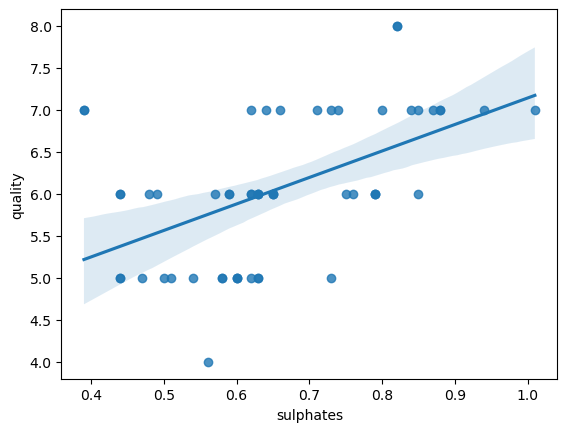

In [152]:
sns.regplot(x = 'sulphates', y = 'quality', data = red_sulphates)

### This Model tells us that for each additional increase in sulphates for red wine, there is an average increase in quality of 3.1522

### The application is:
* Red wine sulphates with quality = 3.989 + 3.1522*(Z additional increase)


In [153]:
r = stats.pearsonr(red_sulphates['sulphates'], red_sulphates['quality'])
print(r)

PearsonRResult(statistic=0.5200098021187638, pvalue=4.721663752996494e-05)


#### Conclusion: I can observe a positive linear relationship between the sulphates and the quality for white wine. Hence, its addition in white wine will increase the quality of white wine. However, a right propotion (between 0.62g/dm^3 - 0.95g/dm^3 from the line of best fit) should be added

# Alcohol in white and red wine:
The percentage of alcohol in the wine

### White wine alcohol:

In [154]:
white_alcohol = white_wine.iloc[:, [11, 12]]
white_alcohol.head()

,alcohol,quality
1,9.5,6
6,9.6,6
8,9.5,6
12,10.8,5
15,11.4,7


In [155]:
x = white_alcohol['alcohol']
y = white_alcohol['quality']

In [156]:
x = sm.add_constant(x)
white_alcohol_model = sm.OLS(y, x).fit()

In [157]:
print(white_alcohol_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     446.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.33e-87
Time:                        20:45:19   Log-Likelihood:                -1841.9
No. Observations:                1522   AIC:                             3688.
Df Residuals:                    1520   BIC:                             3698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7408      0.203      8.594      0.0

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

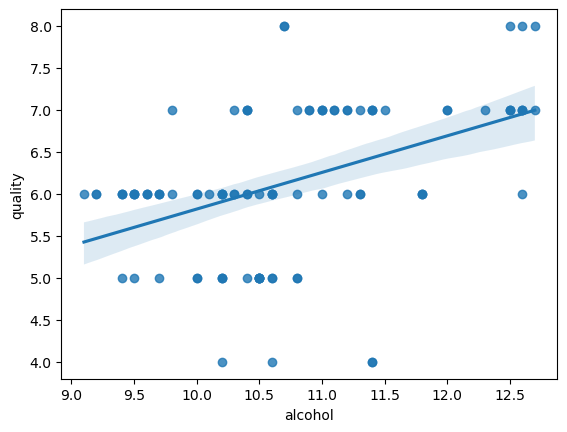

In [158]:
sns.regplot(x = 'alcohol', y = 'quality', data = white_alcohol[:100])

### This Model tells us that for each additional percentage increase in alcohol for white wine, there is an average increase in quality of 0.3825

### The application is:
* White wine alcohol with quality = 1.7408 + 0.3825*(Z additional increase)


In [159]:
r = stats.pearsonr(white_alcohol['alcohol'], white_alcohol['quality'])
print(r)

PearsonRResult(statistic=0.4764753097689978, pvalue=4.326053726758281e-87)


#### Conclusion: I can observe a positive linear relationship between the alcohol % level and the quality for white wine. Hence, its addition in white wine will increase the quality of white wine. However, a right propotion (between 10.03% - 12.5% from the line of best fit) should be added

### Red wine alcohol:

In [160]:
red_alcohol = red_wine.iloc[:, [11, 12]]
red_alcohol.head()

,alcohol,quality
4943,13.1,4
5029,13.0,5
5030,13.0,5
5040,14.0,6
5042,14.0,6


In [161]:
x = red_alcohol['alcohol']
y = red_alcohol['quality']

In [162]:
x = sm.add_constant(x)
red_alcohol_model = sm.OLS(y, x).fit()

In [163]:
print(red_alcohol_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     7.723
Date:                Tue, 18 Apr 2023   Prob (F-statistic):            0.00753
Time:                        20:45:19   Log-Likelihood:                -67.427
No. Observations:                  55   AIC:                             138.9
Df Residuals:                      53   BIC:                             142.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3947      1.322      1.812      0.0

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

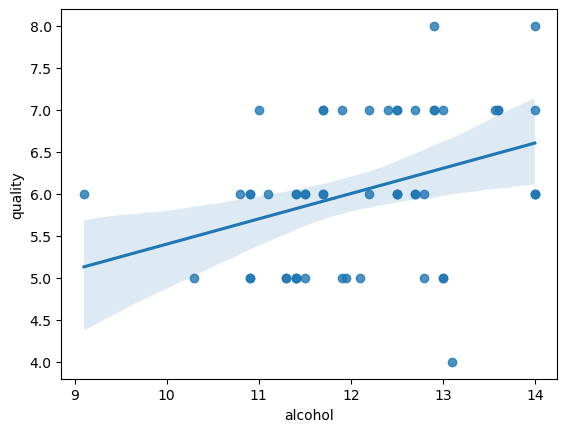

In [164]:
sns.regplot(x = 'alcohol', y = 'quality', data = red_alcohol)

### This Model tells us that for each additional percentage increase in alcohol for red wine, there is an average increase in quality of 0.3008

### The application is:
* Red wine alcohol with quality = 2.39 + 0.3008*(Z additional increase)


In [165]:
r = stats.pearsonr(red_alcohol['alcohol'], red_alcohol['quality'])
print(r)

PearsonRResult(statistic=0.3566378112623287, pvalue=0.007525341391162266)


#### Conclusion: I can observe a positive linear relationship between the alcohol % level and the quality for red wine. Hence, its addition in red wine will increase the quality of red wine. However, a right propotion (between 11.5% - 12.5% from the line of best fit) should be added

In [166]:
work_acid = work.iloc[:, [1, 3]]
work_acid.head()

,fixed acidity,citric acid
1,6.3,0.34
6,6.2,0.16
8,6.3,0.34
12,7.9,0.37
15,6.6,0.38


In [167]:
x = work_acid['citric acid']
y = work_acid['fixed acidity']

In [168]:
x = sm.add_constant(x)
work_acid_model = sm.OLS(y, x).fit()

In [169]:
print(work_acid_model.summary())

                            OLS Regression Results                            
Dep. Variable:          fixed acidity   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     217.1
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.01e-46
Time:                        20:45:20   Log-Likelihood:                -1896.4
No. Observations:                1577   AIC:                             3797.
Df Residuals:                    1575   BIC:                             3808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6443      0.074     76.726      

In [170]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 4943 to 6480
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  55 non-null     object 
 1   fixed acidity         55 non-null     float64
 2   volatile acidity      55 non-null     float64
 3   citric acid           55 non-null     float64
 4   residual sugar        55 non-null     float64
 5   chlorides             55 non-null     float64
 6   free sulfur dioxide   55 non-null     float64
 7   total sulfur dioxide  55 non-null     float64
 8   density               55 non-null     float64
 9   pH                    55 non-null     float64
 10  sulphates             55 non-null     float64
 11  alcohol               55 non-null     float64
 12  quality               55 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 6.0+ KB


In [171]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 1 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1522 non-null   object 
 1   fixed acidity         1522 non-null   float64
 2   volatile acidity      1522 non-null   float64
 3   citric acid           1522 non-null   float64
 4   residual sugar        1522 non-null   float64
 5   chlorides             1522 non-null   float64
 6   free sulfur dioxide   1522 non-null   float64
 7   total sulfur dioxide  1522 non-null   float64
 8   density               1522 non-null   float64
 9   pH                    1522 non-null   float64
 10  sulphates             1522 non-null   float64
 11  alcohol               1522 non-null   float64
 12  quality               1522 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 166.5+ KB
